# Pandas 시각화 연구과제 풀이

## #01. 준비작업

### [1] 패키지 참조

In [107]:
import sys
import numpy as np
from pandas import read_excel, pivot_table
from matplotlib import pyplot as plt

### [2] 그래프 전역 설정

In [108]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

In [109]:
origin = read_excel("https://data.hossam.kr/pydata/mpg.xlsx", index_col="id")
origin

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize


### [4] 데이터 전처리

#### 명목형 변수에 대한 타입변환

In [110]:
origin['manufacturer'] = origin['manufacturer'].astype('category')
origin['model'] = origin['model'].astype('category')
origin['year'] = origin['year'].astype('category')
origin['cyl'] = origin['cyl'].astype('category')
origin['trans'] = origin['trans'].astype('category')
origin['drv'] = origin['drv'].astype('category')
origin['fl'] = origin['fl'].astype('category')
origin['class'] = origin['class'].astype('category')

origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   manufacturer  234 non-null    category
 1   model         234 non-null    category
 2   displ         234 non-null    float64 
 3   year          234 non-null    category
 4   cyl           234 non-null    category
 5   trans         234 non-null    category
 6   drv           234 non-null    category
 7   cty           234 non-null    int64   
 8   hwy           234 non-null    int64   
 9   fl            234 non-null    category
 10  class         234 non-null    category
dtypes: category(8), float64(1), int64(2)
memory usage: 12.5 KB


#### 라벨링 된 변수에 대한 데이터 치환

In [111]:
origin['drv'] = origin['drv'].map({'f': '전륜구동', 'r': '후륜구동', 4: '4륜구동'})
origin

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
id,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),전륜구동,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),전륜구동,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),전륜구동,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),전륜구동,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),전륜구동,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),전륜구동,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),전륜구동,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),전륜구동,16,26,p,midsize


## 문제1

자동차 제조사별로 출시한 자동차 수를 하나의 그래프로 시각화 하시오.

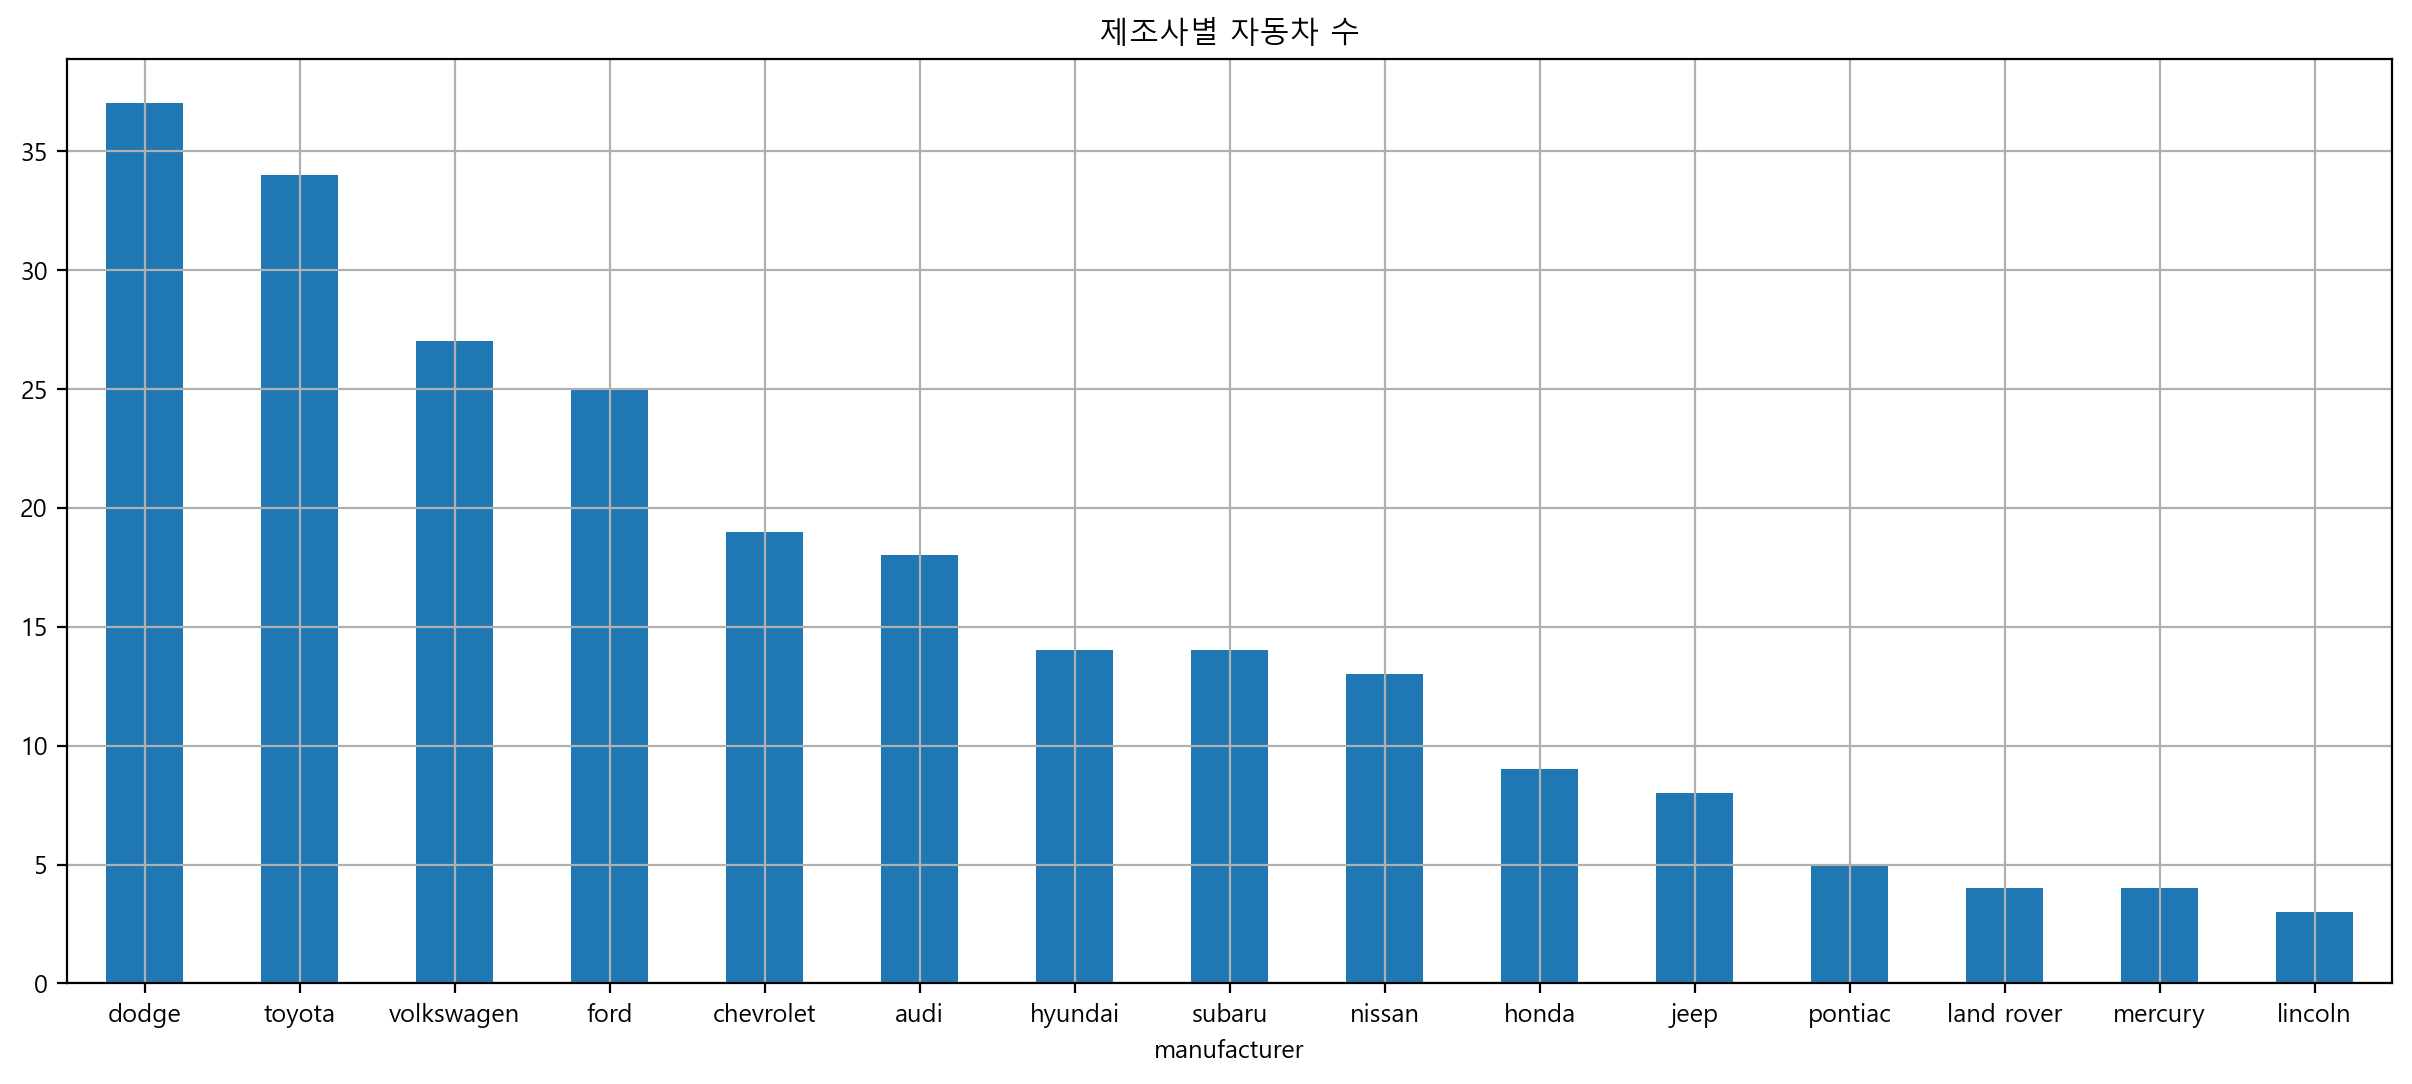

In [112]:
origin['manufacturer'].value_counts().plot.bar(rot=0)
plt.title("제조사별 자동차 수")
plt.grid()
plt.show()
plt.close()

### 문제2

자동차 제조사에 따른 자동차 수를 제조년도를 범주로 하여 하나의 그래프로 시각화 하시오.

In [113]:
df = origin[['manufacturer', 'year', 'model']].groupby(['manufacturer', 'year'], as_index=False).count()
df

C:\Users\leekh\AppData\Local\Temp\ipykernel_9820\22054729.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = origin[['manufacturer', 'year', 'model']].groupby(['manufacturer', 'year'], as_index=False).count()


,manufacturer,year,model
0,audi,1999,9
1,audi,2008,9
2,chevrolet,1999,7
3,chevrolet,2008,12
4,dodge,1999,16
5,dodge,2008,21
6,ford,1999,15
7,ford,2008,10
8,honda,1999,5
9,honda,2008,4


In [114]:
df2 = pivot_table(df, index='manufacturer', columns='year', values='model')
df2

year,1999,2008
manufacturer,,
audi,9.0,9.0
chevrolet,7.0,12.0
dodge,16.0,21.0
ford,15.0,10.0
honda,5.0,4.0
hyundai,6.0,8.0
jeep,2.0,6.0
land rover,2.0,2.0
lincoln,2.0,1.0


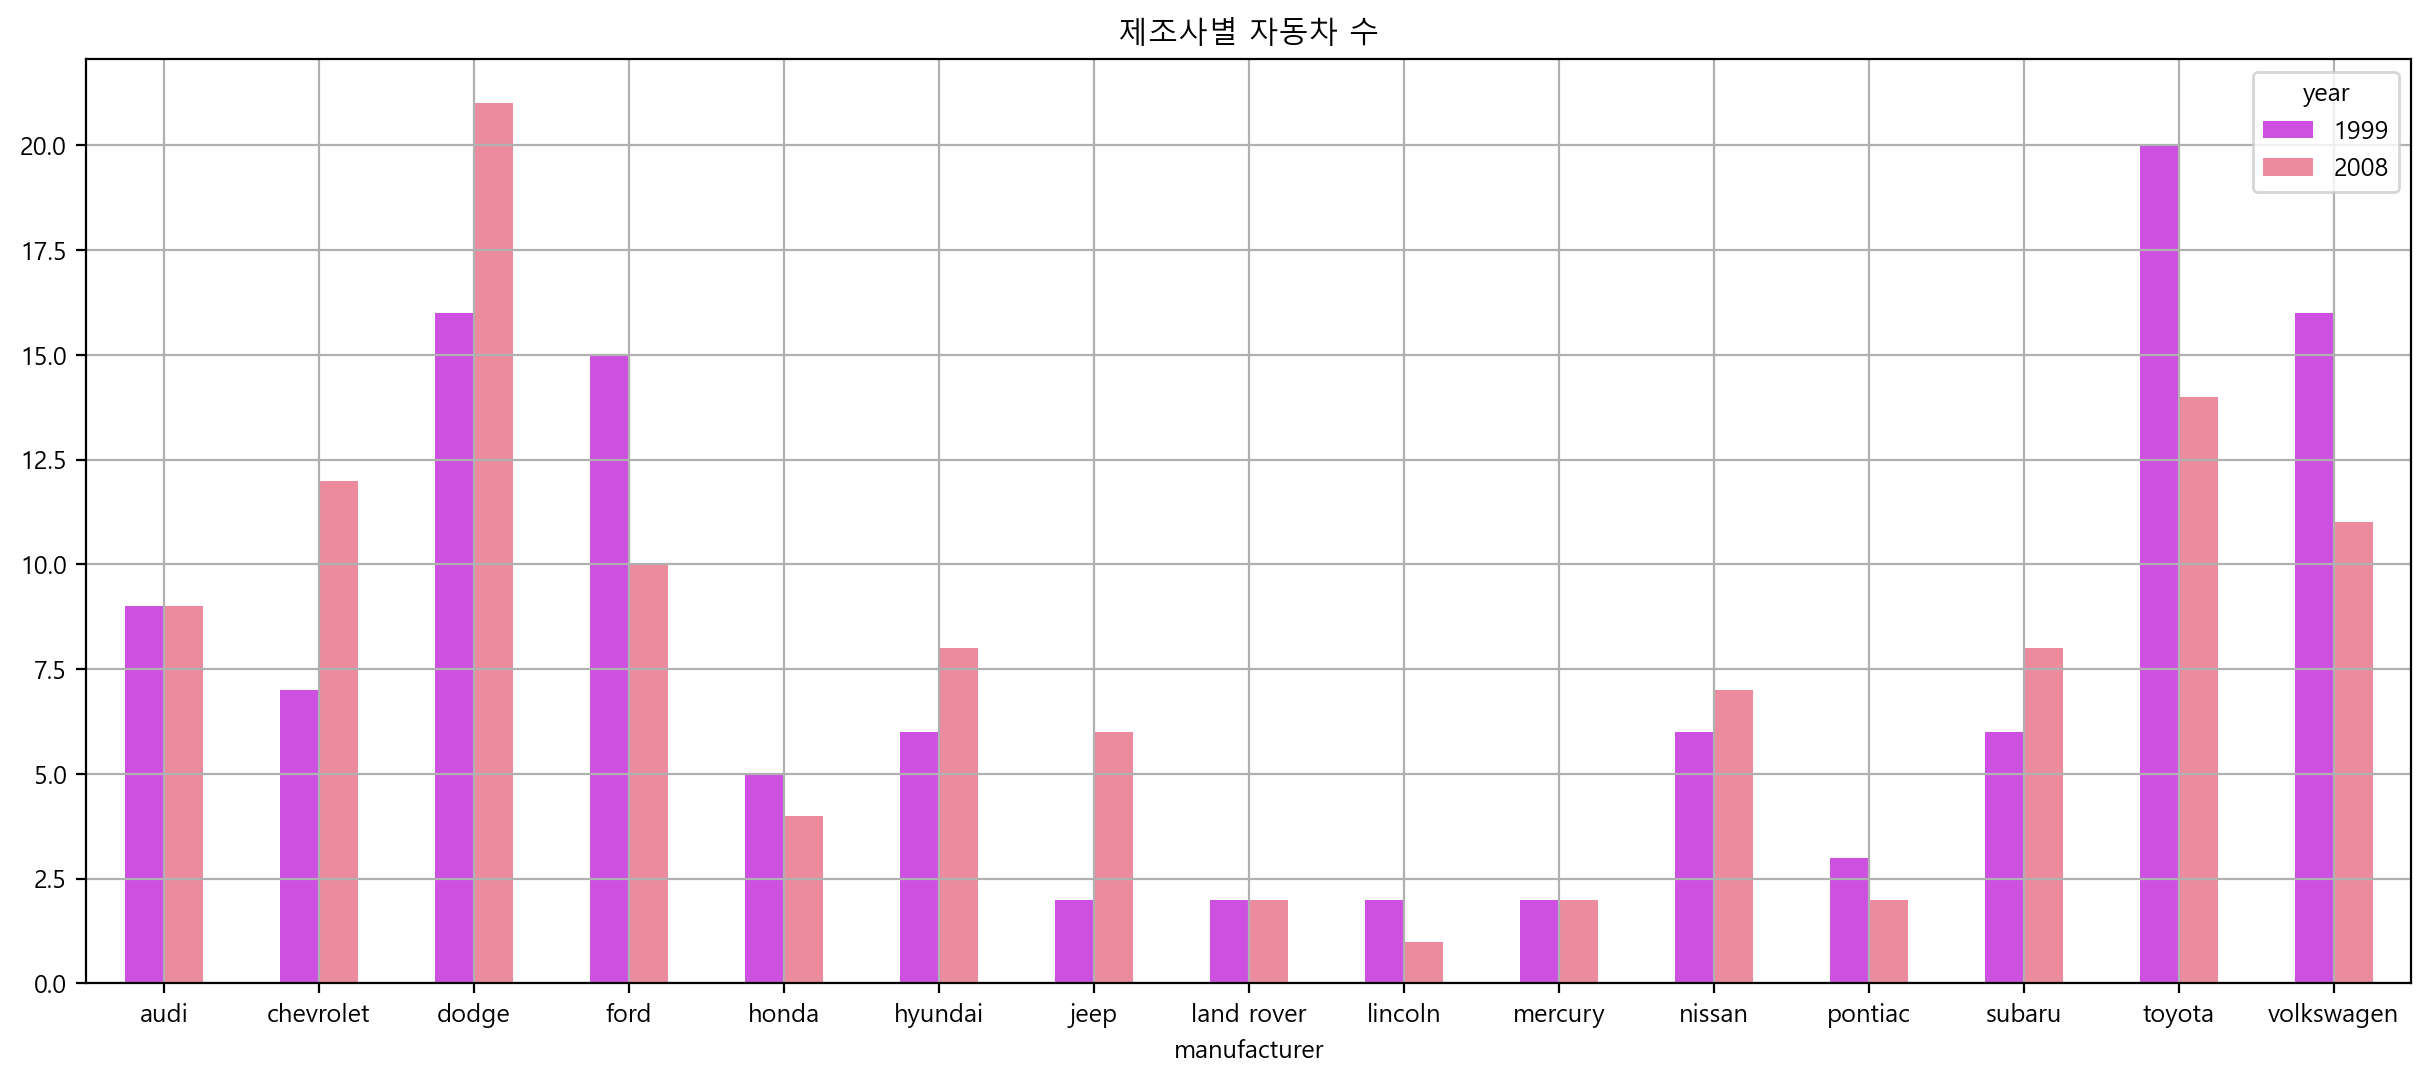

In [115]:
df2.plot.bar(rot=0, color=['#cd50e1', '#eb8b9d'])
plt.title("제조사별 자동차 수")
plt.grid()
plt.show()
plt.close()

### 문제3

구동방식에 따른 자동차 수를 하나의 그래프로 시각화 하시오.

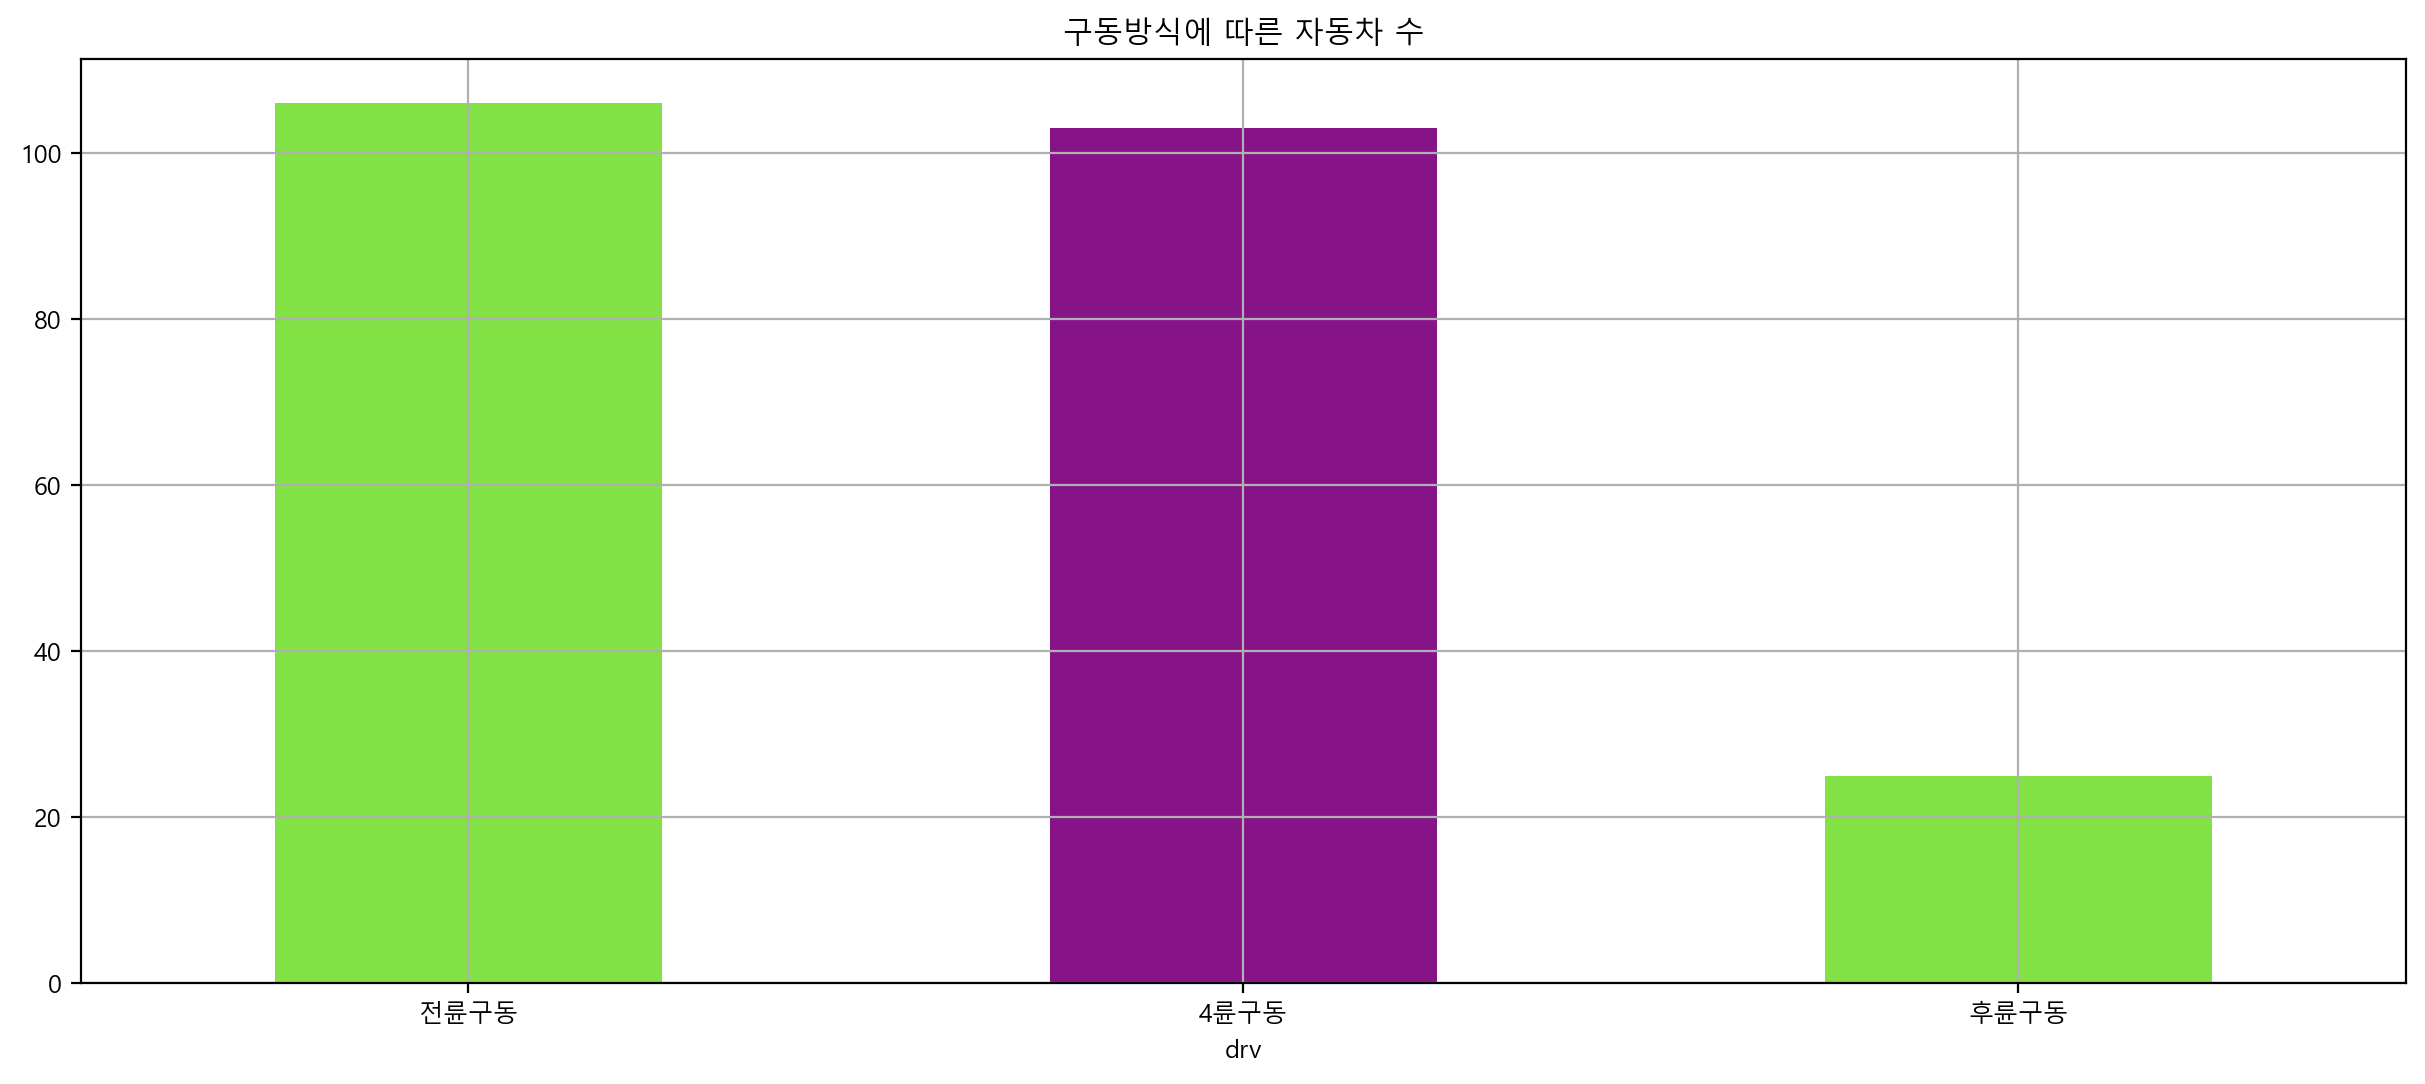

In [116]:
origin['drv'].value_counts().plot.bar(rot=0, color=['#82e144', '#871388'])
plt.title("구동방식에 따른 자동차 수")
plt.grid()
plt.show()
plt.close()

### 문제4

자동차 구동 방식에 따른 도심 연비 평균을 하나의 그래프로 시각화 하시오.

C:\Users\leekh\AppData\Local\Temp\ipykernel_9820\3187546367.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = origin[['drv', 'cty']].groupby('drv').mean()


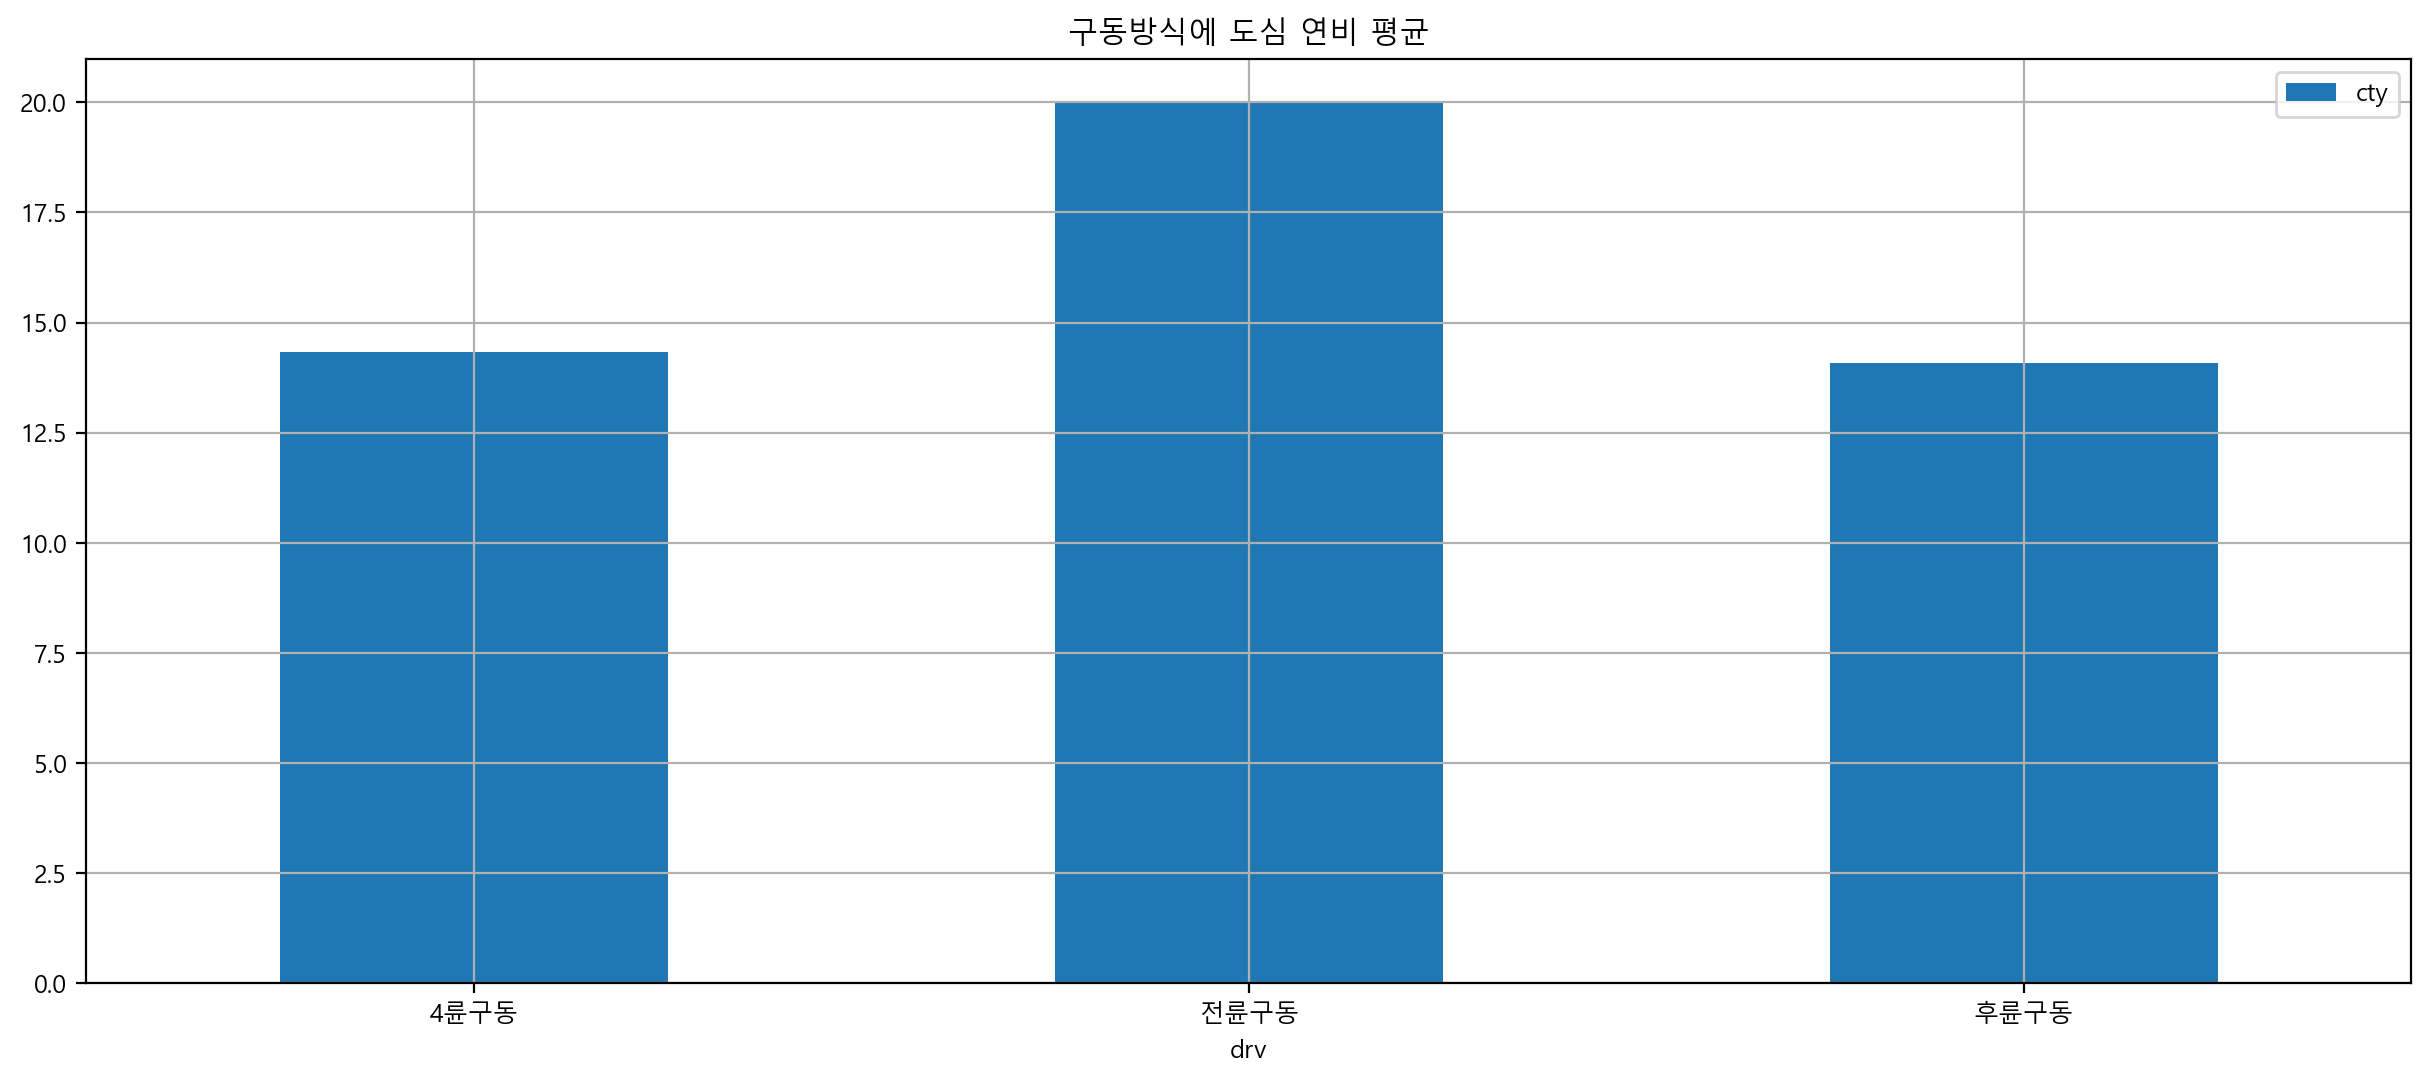

In [117]:
df = origin[['drv', 'cty']].groupby('drv').mean()
df.plot.bar(rot=0)
plt.title("구동방식에 도심 연비 평균")
plt.grid()
plt.show()
plt.close()

### 문제5

자동차 제조사에 따른 도심 연비 평균과 고속도로 연비 평균을 서브플롯 형태로 시각화 하시오.


In [118]:
df = origin[['manufacturer', 'cty', 'hwy']].groupby('manufacturer').mean()
df

C:\Users\leekh\AppData\Local\Temp\ipykernel_9820\241794708.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df = origin[['manufacturer', 'cty', 'hwy']].groupby('manufacturer').mean()


,cty,hwy
manufacturer,,
audi,17.611111,26.444444
chevrolet,15.000000,21.894737
dodge,13.135135,17.945946
ford,14.000000,19.360000
honda,24.444444,32.555556
hyundai,18.642857,26.857143
jeep,13.500000,17.625000
land rover,11.500000,16.500000
lincoln,11.333333,17.000000


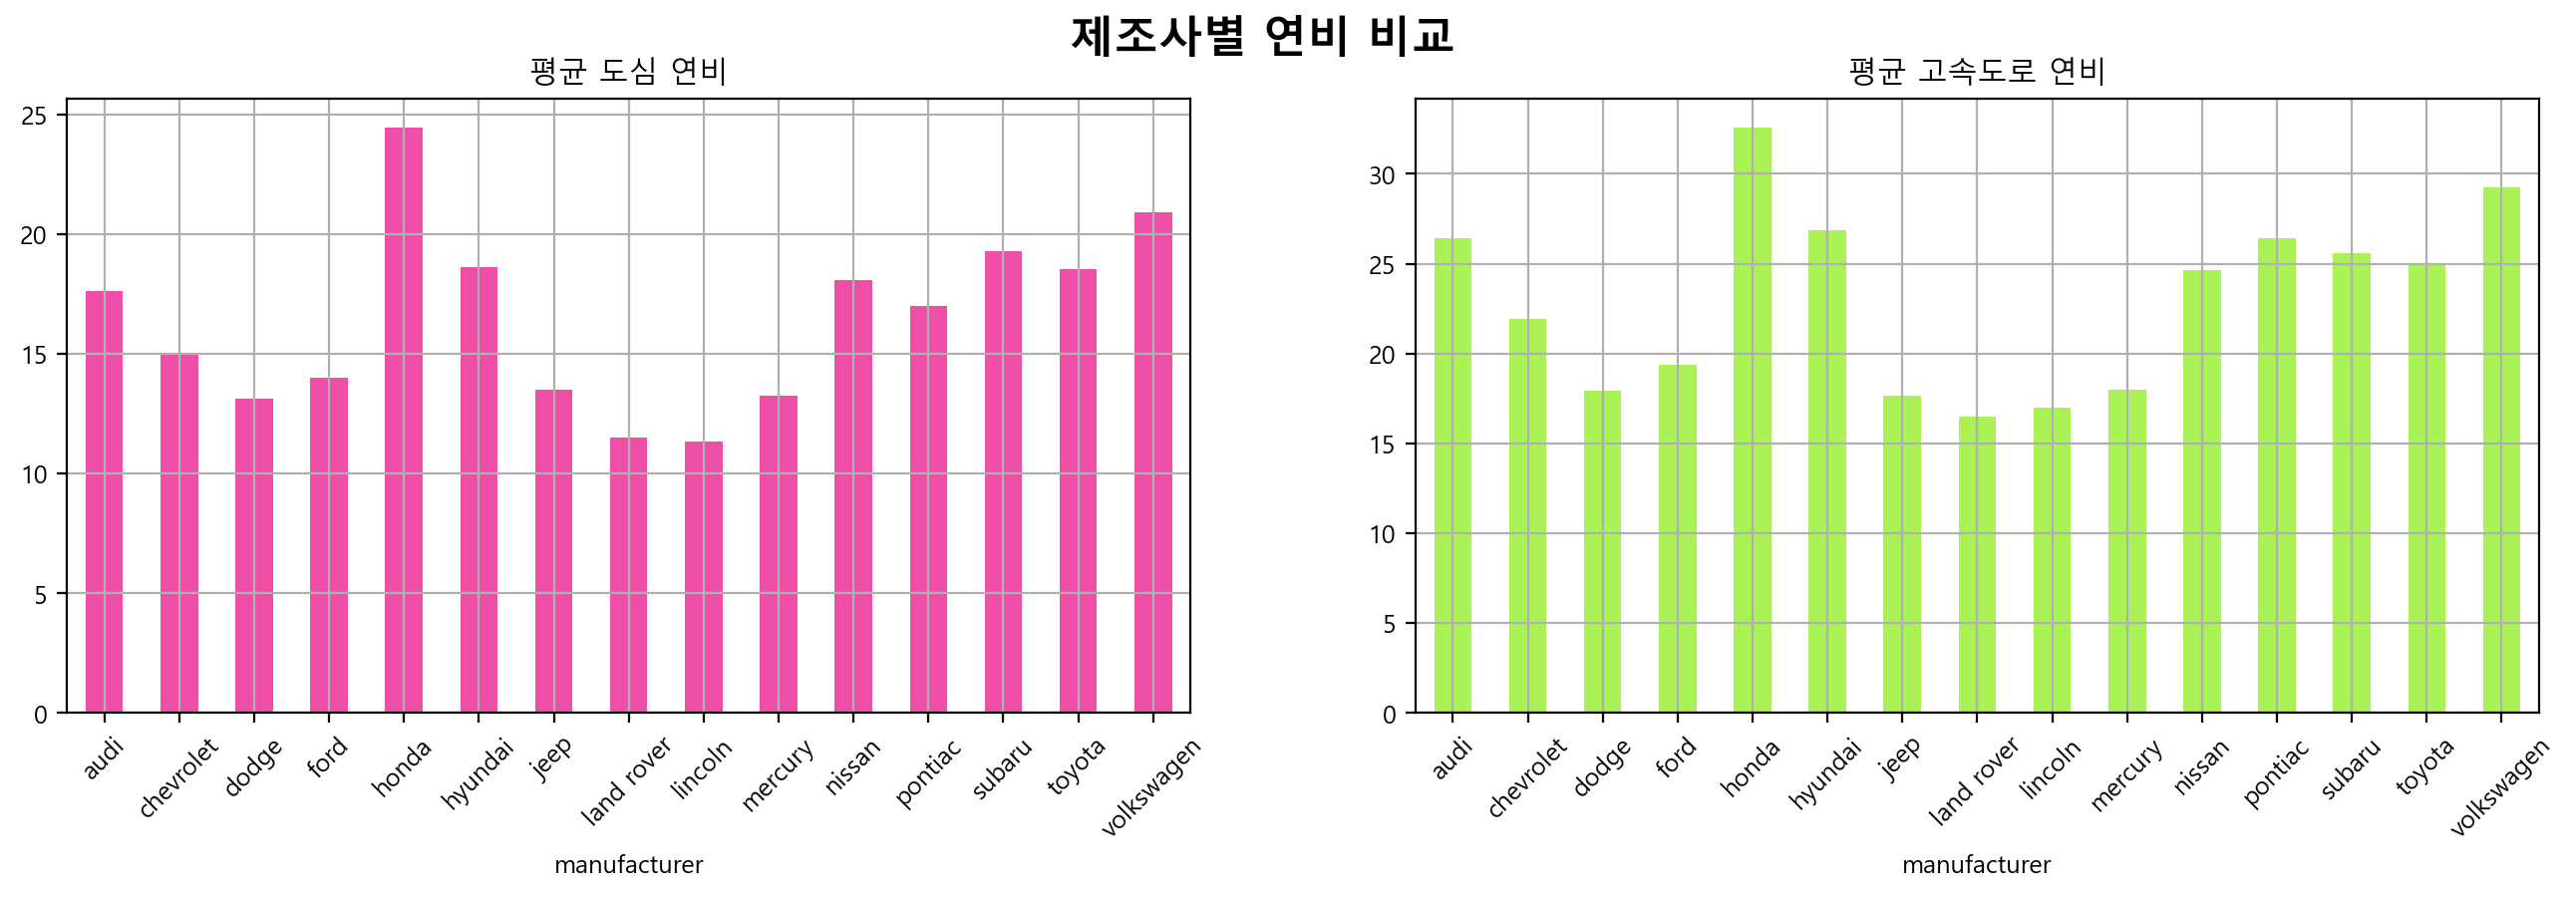

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

fig.suptitle('제조사별 연비 비교', fontsize=16, fontweight='bold')

df['cty'].plot.bar(ax=ax1, rot=45, color='#ee4fa6')
ax1.title.set_text("평균 도심 연비")
ax1.grid()

df['hwy'].plot.bar(ax=ax2, rot=45, color='#aaf255')
ax2.title.set_text("평균 고속도로 연비")
ax2.grid()

plt.show()
plt.close()

### 문제6

배기량과 도심연비, 배기량과 고속도로 연비의 상관관계를 확인하고자 한다.

서브플롯에 각 그래프를 시각화 하고 추세선을 포함시키시오.


In [120]:
df = origin[['displ', 'cty', 'hwy']]
df

,displ,cty,hwy
id,,,
1,1.8,18,29
2,1.8,21,29
3,2.0,20,31
4,2.0,21,30
5,2.8,16,26
...,...,...,...
230,2.0,19,28
231,2.0,21,29
232,2.8,16,26


In [121]:
x = df['displ']
x

id
1      1.8
2      1.8
3      2.0
4      2.0
5      2.8
      ... 
230    2.0
231    2.0
232    2.8
233    2.8
234    3.6
Name: displ, Length: 234, dtype: float64

In [122]:
z1 = np.polyfit(x, df['cty'], 1)
f1 = np.poly1d(z1)
y1 = f1(x)
y1

array([21.25660024, 21.25660024, 20.73050389, 20.73050389, 18.6261185 ,
       18.6261185 , 17.83697398, 21.25660024, 21.25660024, 20.73050389,
       20.73050389, 18.6261185 , 18.6261185 , 17.83697398, 17.83697398,
       18.6261185 , 17.83697398, 14.94344407, 12.04991416, 12.04991416,
       12.04991416, 10.99772146, 10.20857694, 10.99772146, 10.99772146,
        9.6824806 ,  9.6824806 ,  7.57809521, 12.04991416, 12.04991416,
       10.99772146,  8.89333608, 19.67831119, 19.67831119, 17.83697398,
       16.78478128, 16.52173311, 19.67831119, 18.10002215, 17.31087763,
       17.31087763, 17.31087763, 17.31087763, 17.31087763, 15.99563676,
       15.99563676, 15.99563676, 15.46954042, 16.25868494, 16.25868494,
       15.73258859, 15.73258859, 13.6282032 , 13.6282032 , 13.6282032 ,
       12.31296233, 12.31296233, 15.73258859, 13.6282032 , 13.6282032 ,
       13.6282032 , 12.31296233, 10.99772146, 10.47162512, 13.6282032 ,
       13.6282032 , 13.6282032 , 13.6282032 , 13.6282032 , 13.62

In [123]:
z2 = np.polyfit(x, df['hwy'], 1)
f2 = np.poly1d(z2)
y2 = f2(x)
y2

array([29.3425912 , 29.3425912 , 28.63647344, 28.63647344, 25.81200239,
       25.81200239, 24.75282575, 29.3425912 , 29.3425912 , 28.63647344,
       28.63647344, 25.81200239, 25.81200239, 24.75282575, 24.75282575,
       25.81200239, 24.75282575, 20.86917807, 16.98553038, 16.98553038,
       16.98553038, 15.57329486, 14.51411821, 15.57329486, 15.57329486,
       13.80800045, 13.80800045, 10.98352941, 16.98553038, 16.98553038,
       15.57329486, 12.74882381, 27.22423792, 27.22423792, 24.75282575,
       23.34059023, 22.98753135, 27.22423792, 25.10588463, 24.04670799,
       24.04670799, 24.04670799, 24.04670799, 24.04670799, 22.28141359,
       22.28141359, 22.28141359, 21.57529583, 22.63447247, 22.63447247,
       21.92835471, 21.92835471, 19.10388366, 19.10388366, 19.10388366,
       17.33858926, 17.33858926, 21.92835471, 19.10388366, 19.10388366,
       19.10388366, 17.33858926, 15.57329486, 14.8671771 , 19.10388366,
       19.10388366, 19.10388366, 19.10388366, 19.10388366, 19.10

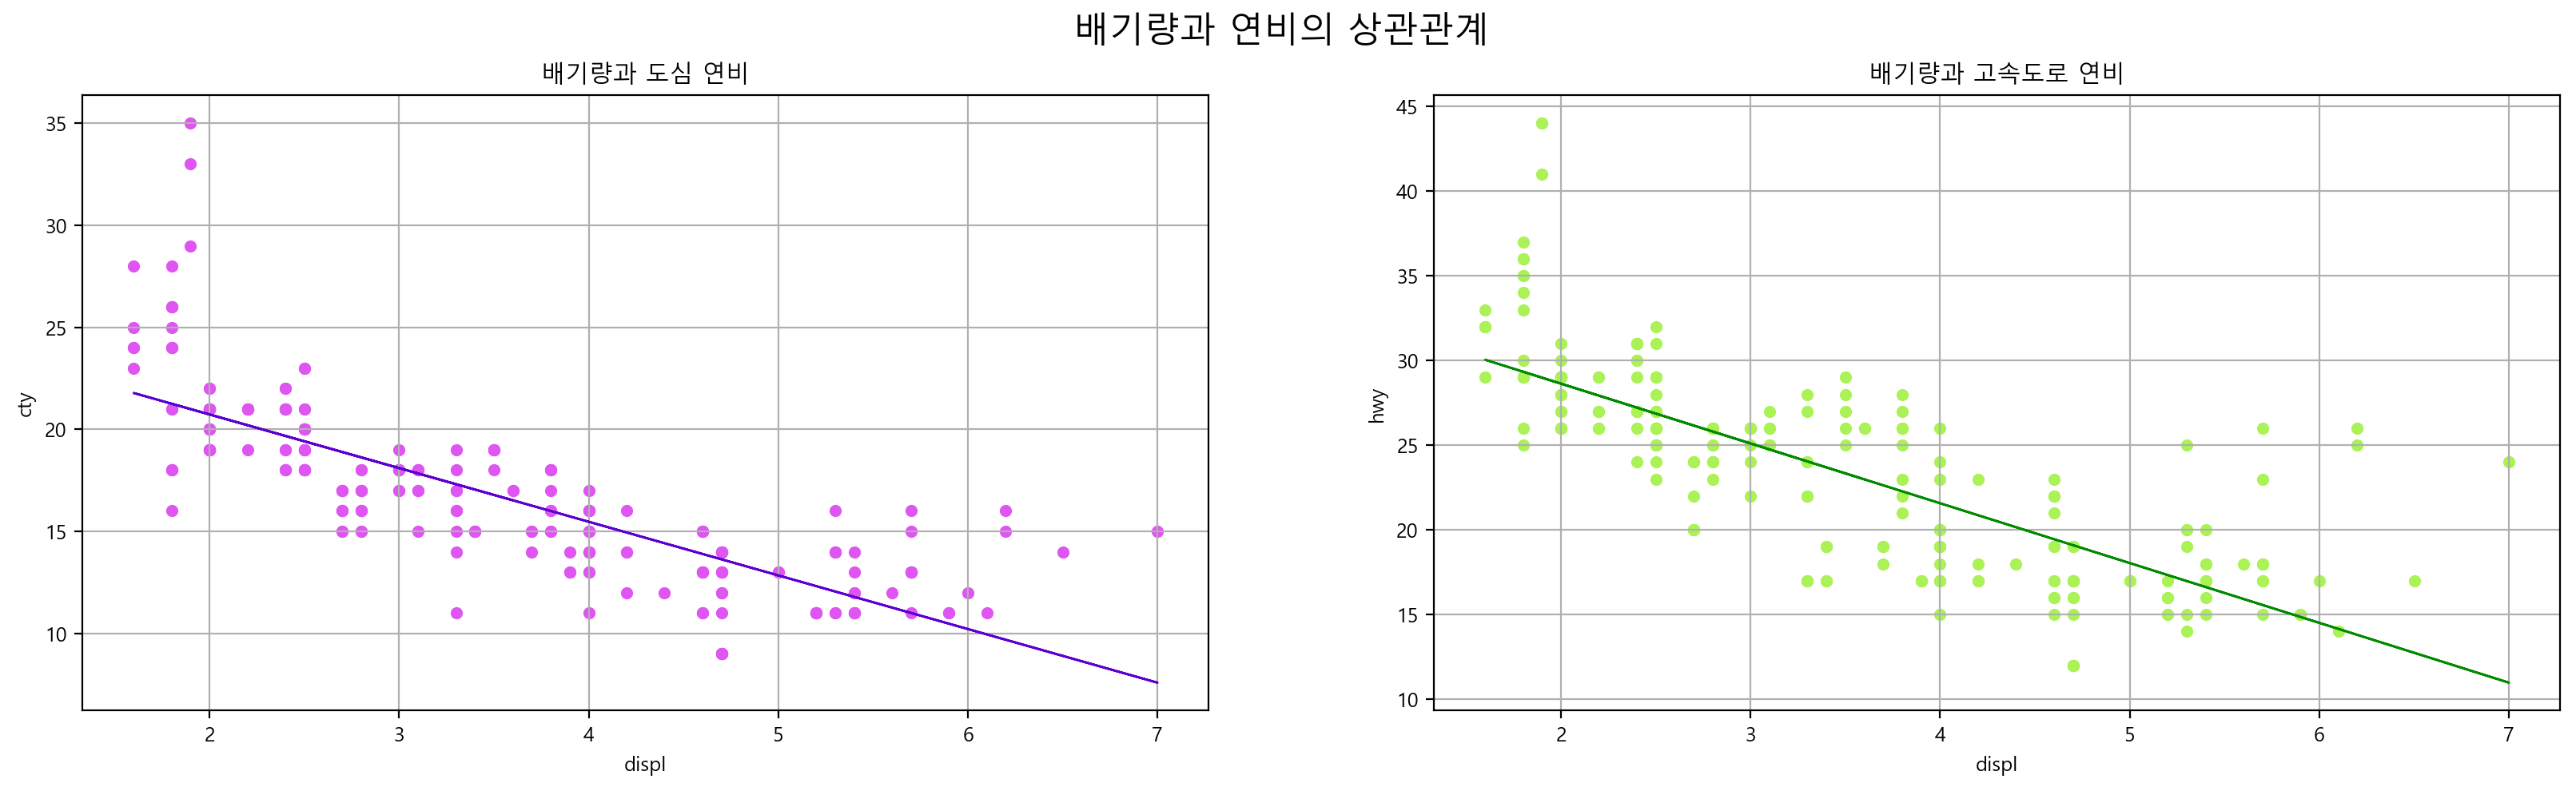

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

fig.suptitle('배기량과 연비의 상관관계', fontsize=16)

df.plot.scatter(x='displ', y='cty', ax=ax1, color='#df55f1')
ax1.plot(x, y1, color='#5c00d2', linewidth=1)
ax1.title.set_text("배기량과 도심 연비")
ax1.grid()

df.plot.scatter(x='displ', y='hwy', ax=ax2, color='#aaf255')
ax2.plot(x, y2, color='#008b00', linewidth=1)
ax2.title.set_text("배기량과 고속도로 연비")
ax2.grid()

plt.show()
plt.close()


### 문제 7


In [125]:
df = origin.copy()

In [126]:
df['mileage_avg'] = (df['cty'] + df['hwy']) / 2
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_avg
id,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),전륜구동,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),전륜구동,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),전륜구동,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),전륜구동,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),전륜구동,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),전륜구동,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),전륜구동,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),전륜구동,16,26,p,midsize,21.0


In [127]:
mileage_avg = df['mileage_avg'].mean()
mileage_avg

20.14957264957265

In [128]:
df['mileage_grade'] = np.where(df['mileage_avg'] > mileage_avg, 'Pass', 'Fail')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_avg,mileage_grade
id,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),전륜구동,18,29,p,compact,23.5,Pass
2,audi,a4,1.8,1999,4,manual(m5),전륜구동,21,29,p,compact,25.0,Pass
3,audi,a4,2.0,2008,4,manual(m6),전륜구동,20,31,p,compact,25.5,Pass
4,audi,a4,2.0,2008,4,auto(av),전륜구동,21,30,p,compact,25.5,Pass
5,audi,a4,2.8,1999,6,auto(l5),전륜구동,16,26,p,compact,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),전륜구동,19,28,p,midsize,23.5,Pass
231,volkswagen,passat,2.0,2008,4,manual(m6),전륜구동,21,29,p,midsize,25.0,Pass
232,volkswagen,passat,2.8,1999,6,auto(l5),전륜구동,16,26,p,midsize,21.0,Pass


In [129]:
df1 = df[df['mileage_grade'] == 'Pass']
df1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mileage_avg,mileage_grade
id,,,,,,,,,,,,,
1,audi,a4,1.8,1999,4,auto(l5),전륜구동,18,29,p,compact,23.5,Pass
2,audi,a4,1.8,1999,4,manual(m5),전륜구동,21,29,p,compact,25.0,Pass
3,audi,a4,2.0,2008,4,manual(m6),전륜구동,20,31,p,compact,25.5,Pass
4,audi,a4,2.0,2008,4,auto(av),전륜구동,21,30,p,compact,25.5,Pass
5,audi,a4,2.8,1999,6,auto(l5),전륜구동,16,26,p,compact,21.0,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),전륜구동,19,28,p,midsize,23.5,Pass
231,volkswagen,passat,2.0,2008,4,manual(m6),전륜구동,21,29,p,midsize,25.0,Pass
232,volkswagen,passat,2.8,1999,6,auto(l5),전륜구동,16,26,p,midsize,21.0,Pass


In [130]:
df2 = df1[['model', 'mileage_avg']]
df3 = df2.groupby('model').mean()
df3.dropna(inplace=True)
df3

C:\Users\leekh\AppData\Local\Temp\ipykernel_9820\1397875939.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3 = df2.groupby('model').mean()


,mileage_avg
model,
a4,23.571429
a4 quattro,21.916667
a6 quattro,21.000000
altima,24.666667
camry,24.071429
camry solara,24.000000
caravan 2wd,20.625000
civic,28.500000
corolla,29.800000


In [131]:
df4 = df3.sort_values('mileage_avg', ascending=False)
df4

,mileage_avg
model,
corolla,29.800000
civic,28.500000
new beetle,28.416667
jetta,25.875000
altima,24.666667
camry,24.071429
camry solara,24.000000
gti,23.700000
a4,23.571429


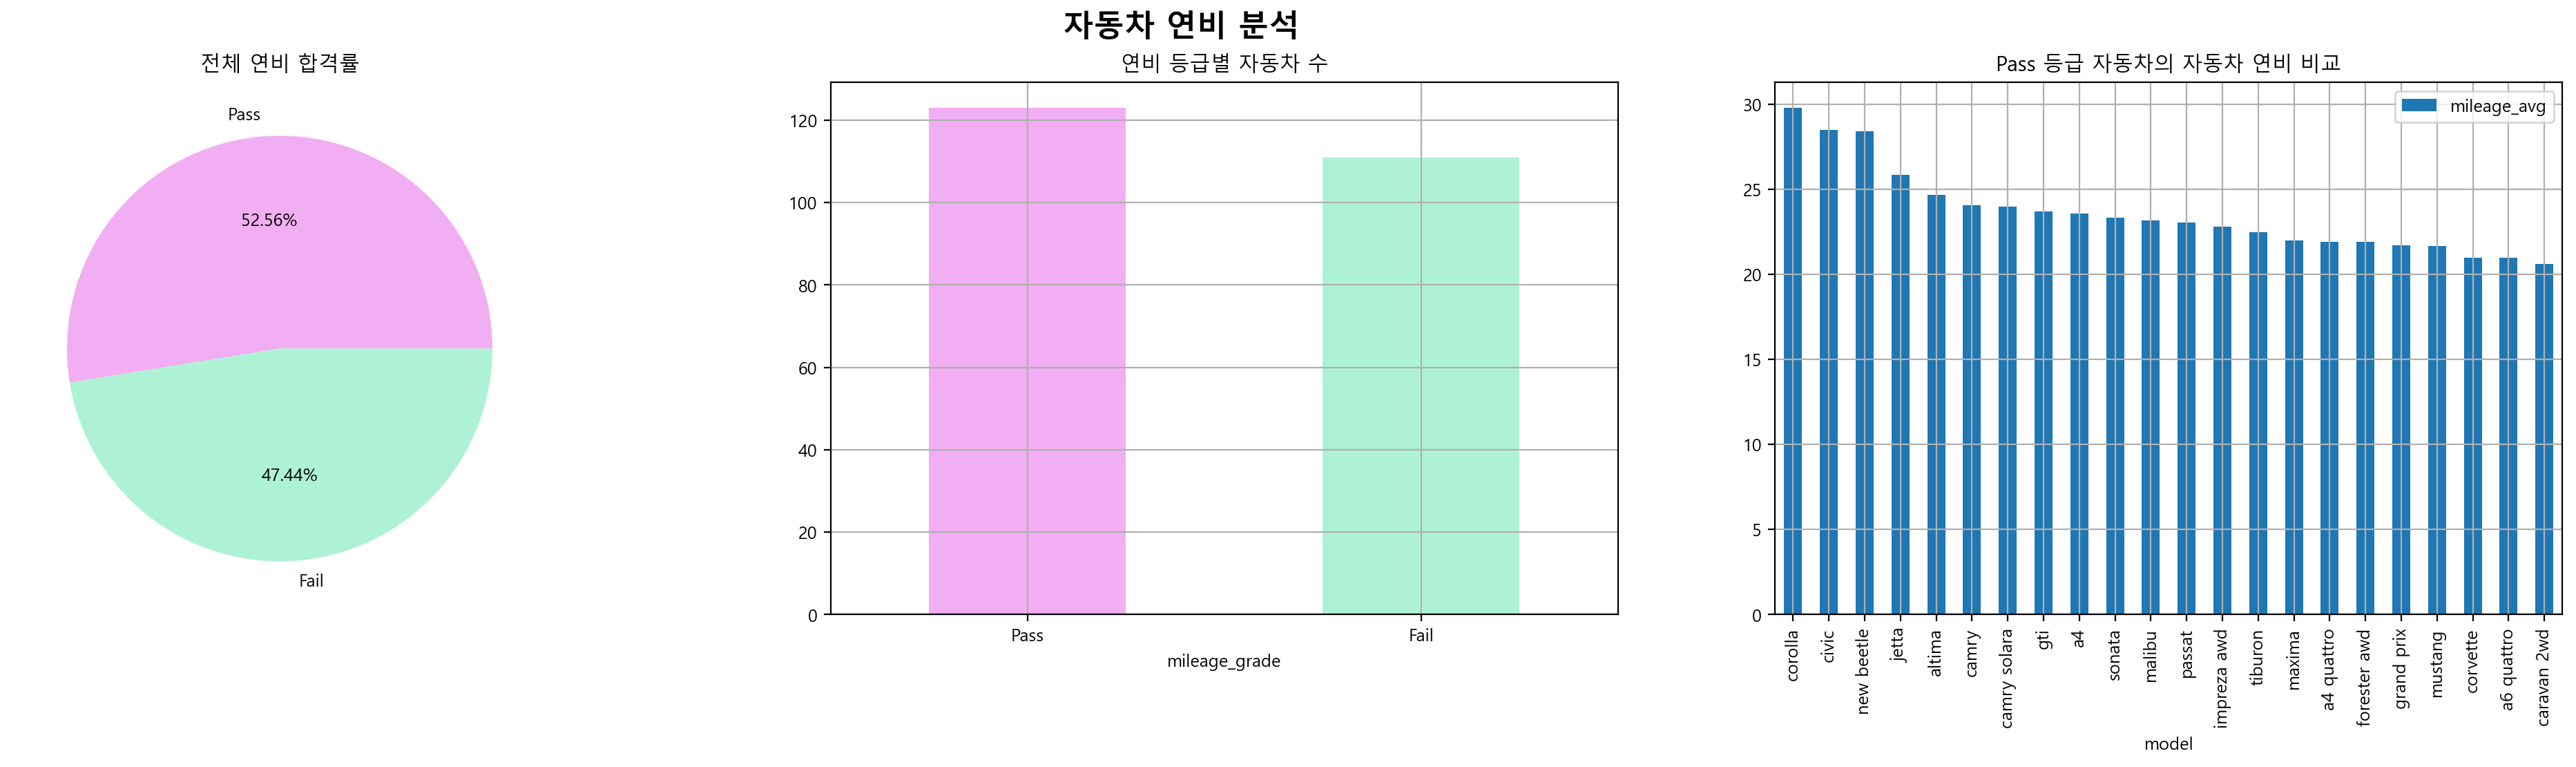

In [132]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 5))

fig.suptitle('자동차 연비 분석', fontsize=16, fontweight='bold')

df['mileage_grade'].value_counts().plot.pie(ax=ax1, autopct='%.2f%%', colors=['#f2aef2', '#aef2d5'])
ax1.title.set_text("전체 연비 합격률")
ax1.set(ylabel=None)

df['mileage_grade'].value_counts().plot.bar(ax=ax2, rot=0, color=['#f2aef2', '#aef2d5'])
ax2.title.set_text("연비 등급별 자동차 수")
ax2.grid()

df4.plot.bar(ax=ax3, rot=90)
ax3.title.set_text("Pass 등급 자동차의 자동차 연비 비교")
ax3.grid()

plt.show()
plt.close()